# Supervised Learning - Foundations: ShowTime 

**Marks: 60**

## Context
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 billion dollars by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

## Objective
ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

 

## Data Description
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary**

- visitors: Number of visitors, in millions, to the platform in the past week
- ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
- major_sports_event: Any major sports event on the day
- genre: Genre of the content
- dayofweek: Day of the release of the content
- season: Season of the release of the content
- views_trailer: Number of views, in millions, of the content trailer
- views_content: Number of first-day views, in millions, of the content

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


### Let us start by importing necessary libraries and data

In [1]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# loading data
data = pd.read_csv('ottdata.csv') ##  Complete the code to read the data

In [3]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") # Complete the code to get the shape of data

There are 1000 rows and 8 columns.


In [4]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
507,1.58,1323.74,0,Comedy,Sunday,Spring,57.85,0.43
818,1.54,2122.33,0,Action,Thursday,Spring,56.82,0.45
452,1.82,1152.29,0,Comedy,Friday,Fall,165.58,0.63
368,2.03,1145.37,0,Sci-Fi,Friday,Spring,59.99,0.50
242,1.75,1060.86,0,Thriller,Friday,Summer,58.99,0.50
929,1.41,1231.30,1,Comedy,Saturday,Winter,53.89,0.40
262,1.63,1623.67,0,Action,Wednesday,Winter,108.20,0.46
810,1.83,1398.05,0,Others,Friday,Fall,55.58,0.42
318,2.06,1928.85,1,Sci-Fi,Saturday,Summer,52.40,0.51
49,1.92,1342.77,1,Others,Friday,Spring,60.37,0.34


In [5]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy() # Complete the code to create a copy of data

In [6]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [7]:
# checking for unique values
df.nunique() 


visitors               56
ad_impressions         80
major_sports_event      2
genre                   8
dayofweek               7
season                  4
views_trailer         799
views_content          61
dtype: int64

In [8]:
df.duplicated()# checking for duplicate values
len(df.duplicated() ==
False)# Complete the code to get total number of duplicate values

1000

- There are no duplicated value.

In [9]:
# checking for missing values in the data
df.isnull().sum() # Complete the code to get total number of missing values

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

- There are no missing value in the data. 

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [10]:
# Write the code to print the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


### Observations:
- There are 1000 visitors,ad_impressions, major_sports_event, and 1000 recorded genre, dayofweek, season,views_trailer,views content
- genre has 8 unique value and `others` apperar most
- Friday has the most choosen day to watch a movie
- Visitors go to movie mostly on Winter Season
- `views_trailer` will have have right skew distribution. It will need a log transformation.

### Univariate Analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`views_content`**

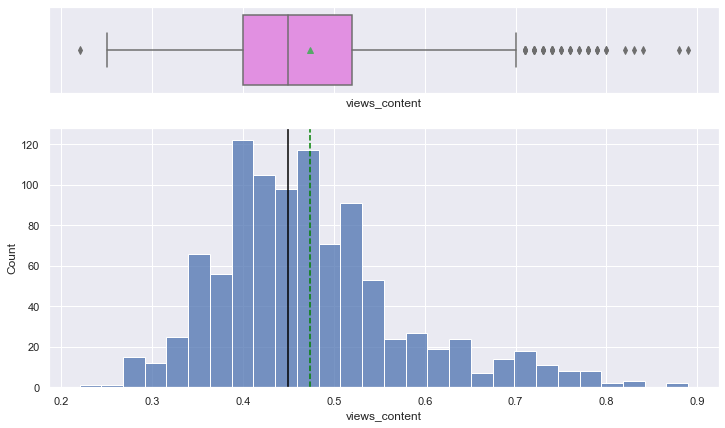

In [12]:
histogram_boxplot(df, "views_content") # boxplot for views_content using dataframe

- Content views has a closed to normal distribution. 

**`visitors`**

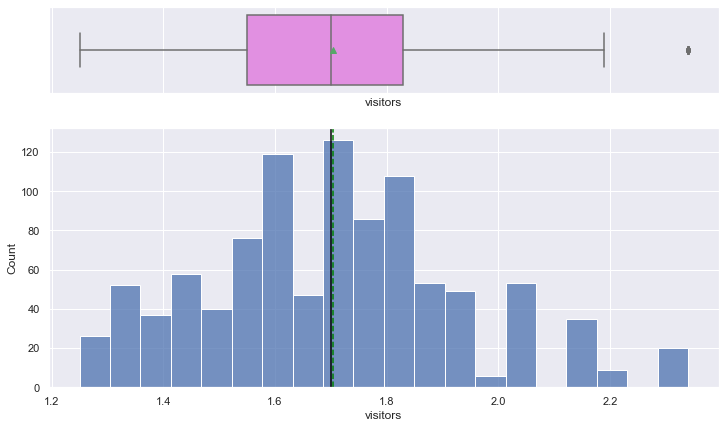

In [13]:
histogram_boxplot(df, "visitors")  ## Complete the code to create histogram_boxplot for 'visitors'

- Visitors has a normal distribution.Mean and Median value is about 1.7M .  

**`ad_impressions`**

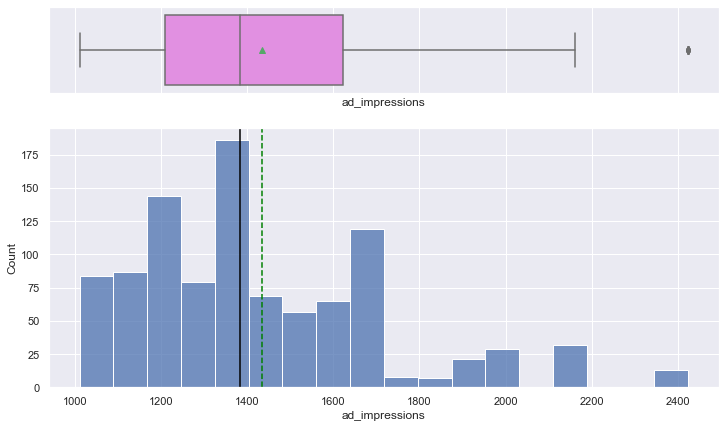

In [14]:
histogram_boxplot(df, "ad_impressions")  ## Complete the code to create histogram_boxplot for 'ad_impressions'

- ad_impressions has a close to normal distribution. No need for log transformation. 

**`views_trailer`**

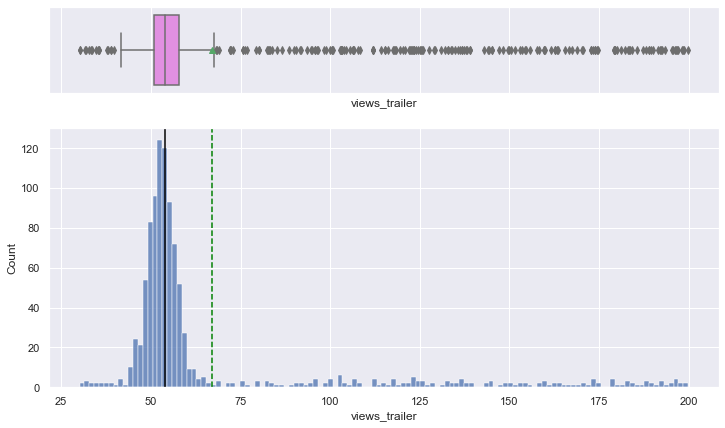

In [15]:
histogram_boxplot(df, "views_trailer")  ## Complete the code to create histogram_boxplot for 'views_trailer'

- views_trailer is heavily right skewed. Log transformation is needed.  

In [16]:
df["views_trailer_log"] = np.log(df["views_trailer"]) ## Complete the code to take log over df["views_trailer"]

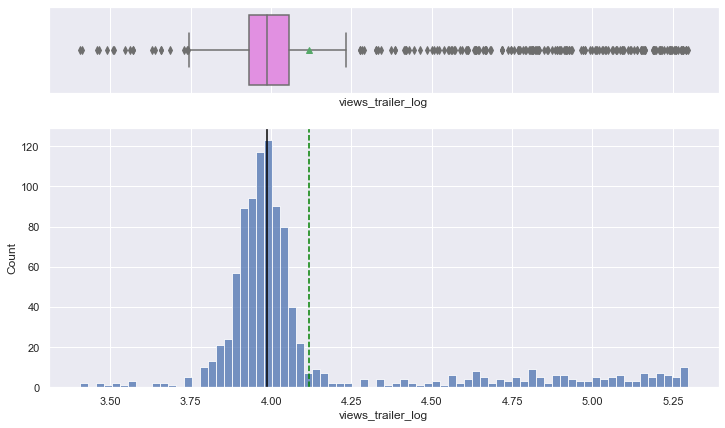

In [17]:
histogram_boxplot(df, "views_trailer_log")  ## Complete the code to create histogram_boxplot for 'views_trailer_log'

-The shape looks the same but since numbers are more computable it will help for data.

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`major_sports_event`**

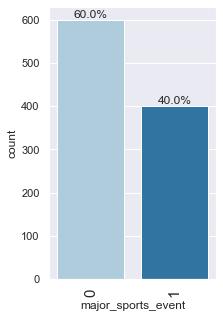

In [19]:
labeled_barplot(df, "major_sports_event", perc=True) # barplot for major_sports_event

- 40% of the events are major sports event. 

**`genre`**

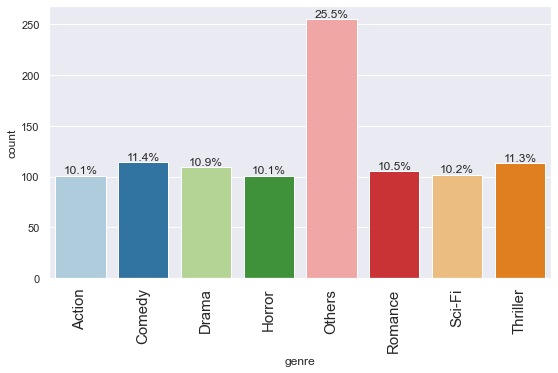

In [20]:
labeled_barplot(df, "genre", perc=True) ## Complete the code to create labeled_barplot for 'genre'

- Others is leading on `genre`. Comedy and Thriller is most preffered, but the other genres percentages are very closed to each other. 

**`dayofweek`**

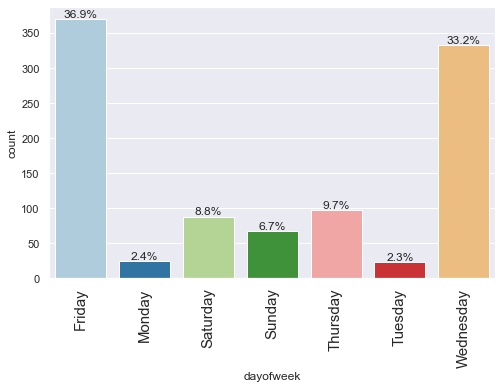

In [21]:
labeled_barplot(df, "dayofweek", perc=True) ## Complete the code to create labeled_barplot for 'dayofweek'

- On Fridays and Wednesdays most contents are released

**`season`**

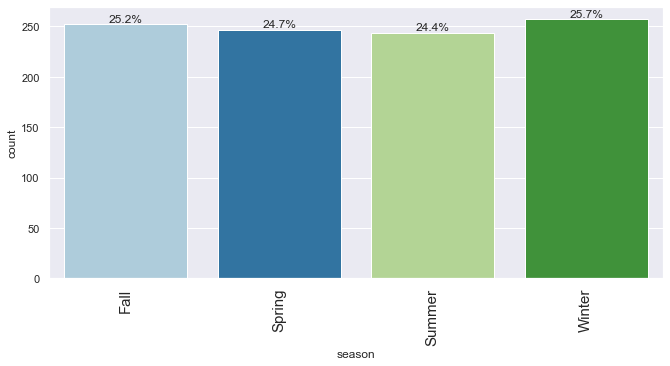

In [22]:
labeled_barplot(df, "season", perc=True, n=10) ## Complete the code to create labeled_barplot for 'season'

- There is almost an equal amount of movie watched in each season.

### Bivariate Analysis


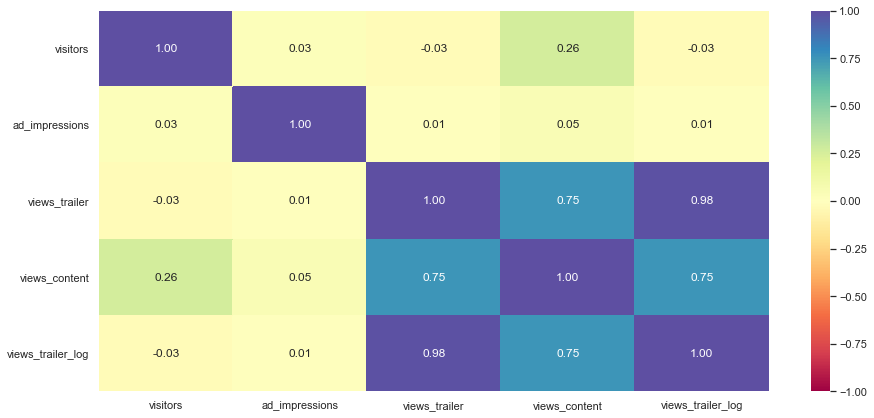

In [23]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping major_sports_event as it is nominal in nature
cols_list.remove("major_sports_event")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- trailer views and content views has a high correlation (0.75). 

<AxesSubplot:xlabel='major_sports_event', ylabel='views_content'>

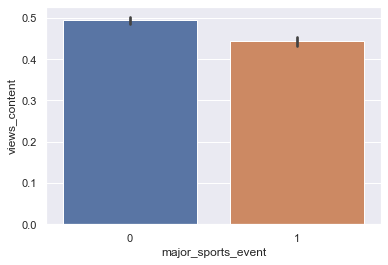

In [24]:
# checking the relation of content view with major sport events
sns.barplot(data=df, x="major_sports_event", y="views_content")

- ~ 0.44 million visitors viewes content in a major sports event.

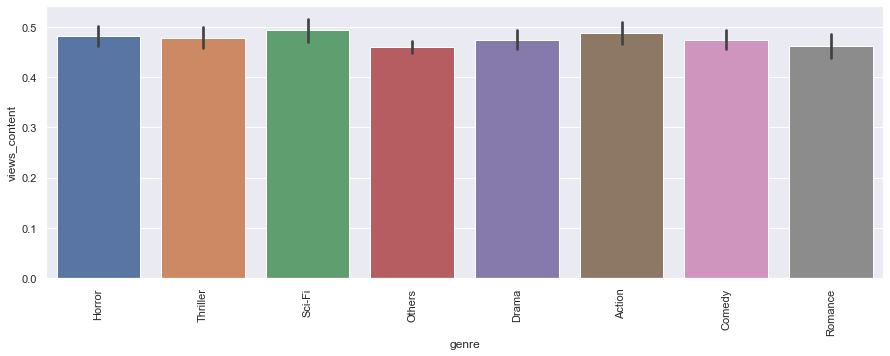

In [25]:
# checking the relation of content view with genre
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="genre", y="views_content") # Complete the code to plot barplot for genre and views_content
plt.xticks(rotation=90)
plt.show()

- There is no significant difference among the genres.Sci-Fi is leading. 

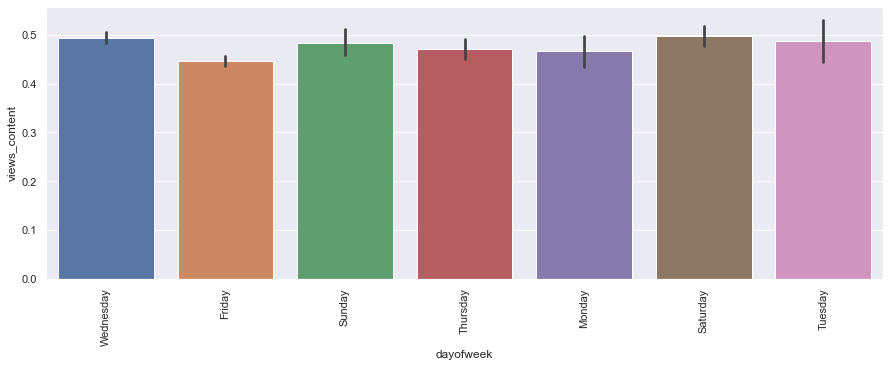

In [26]:
# checking the relation of content view with day of the week
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="dayofweek", y="views_content") # Complete the code to plot barplot for dayofweek and views_content
plt.xticks(rotation=90)
plt.show()

- Visitors prefer to look at the content mostly Saturday,Wednesday and Tuesday respectively.

<AxesSubplot:xlabel='season', ylabel='views_content'>

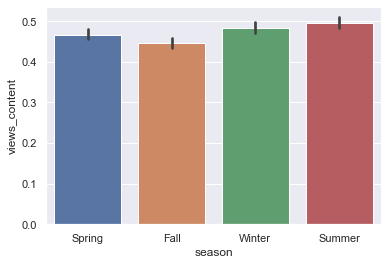

In [27]:
# checking the relation of content view with season
sns.barplot(data=df,x="season", y="views_content") # Complete the code to plot barplot for season and views_content

- Visitors prefer to view at the content mostly on Summer, Winter and Spring respectively.

## Data Preprocessing

**We will replace the 0 and 1 in `major_sports_event` by '*No*' and '*Yes*' respectively.**

In [28]:
df["major_sports_event"] = df["major_sports_event"].replace({0: "No", 1: "Yes"})
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content,views_trailer_log
0,1.67,1113.81,No,Horror,Wednesday,Spring,56.70,0.51,4.037774
1,1.46,1498.41,Yes,Thriller,Friday,Fall,52.69,0.32,3.964426
2,1.47,1079.19,Yes,Thriller,Wednesday,Fall,48.74,0.39,3.886500
3,1.85,1342.77,Yes,Sci-Fi,Friday,Fall,49.81,0.44,3.908216
4,1.46,1498.41,No,Sci-Fi,Sunday,Winter,55.83,0.46,4.022311


### Outlier Check

- Let's check for outliers in the data.

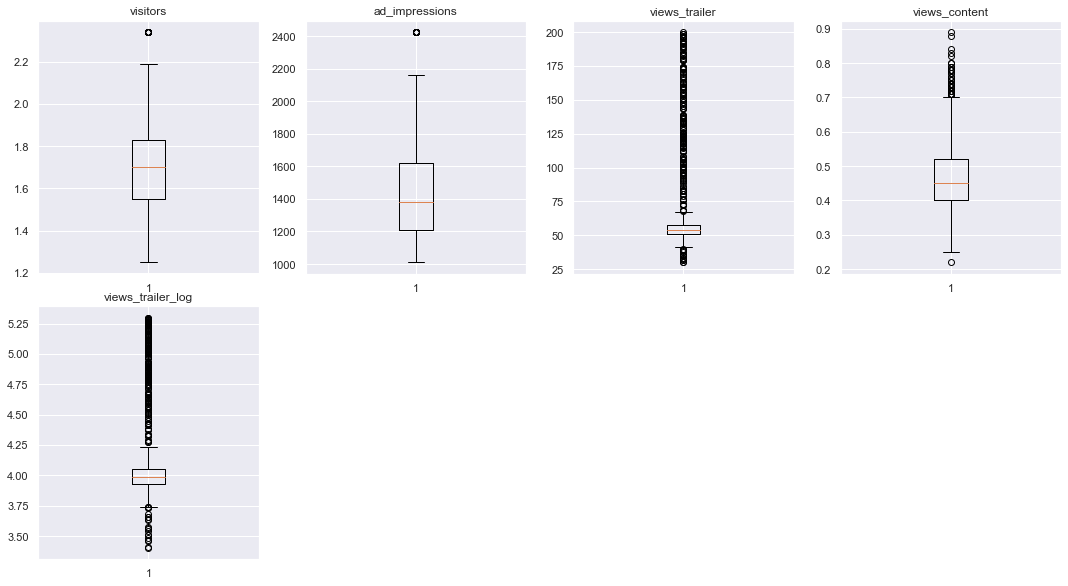

In [29]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observations

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.
- We will use views_trailer_log instead views_trailer since it has less outliers.

### Data Preparation for modeling

- We want to determine the driving factors behind first-day viewership, so we will use `views_content` as our target variable.
- We will drop the log-transformed version of the number of trailer views.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [30]:
# defining the dependent and independent variables
X = df.drop(["views_trailer", "views_content"], axis=1)
y = df["views_content"] # fill the blank to define the dependent (target) variable

print(X.head())
print(y.head())

   visitors  ad_impressions major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                 No    Horror  Wednesday  Spring   
1      1.46         1498.41                Yes  Thriller     Friday    Fall   
2      1.47         1079.19                Yes  Thriller  Wednesday    Fall   
3      1.85         1342.77                Yes    Sci-Fi     Friday    Fall   
4      1.46         1498.41                 No    Sci-Fi     Sunday  Winter   

   views_trailer_log  
0           4.037774  
1           3.964426  
2           3.886500  
3           3.908216  
4           4.022311  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [31]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,visitors,ad_impressions,views_trailer_log,major_sports_event_Yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,4.037774,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,3.964426,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,3.886500,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,3.908216,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,4.022311,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [32]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train and test in specified ratio

In [33]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0]) # fill the blank to print number of rows in test set

Number of rows in train data = 700
Number of rows in test data = 300


## Building a Linear Regression model


In [34]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          4.44e-214
Time:                        14:16:34   Log-Likelihood:                 1121.0
No. Observations:                 700   AIC:                            -2200.
Df Residuals:                     679   BIC:                            -2104.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Observations

- The R-squared is  0.792 and Adjusted R squared is  0.785, indicating that it can explain ~79% of the variance in the views_content.

- This is a clear indication that we have been able to create a very good model which is not underfitting the data.

- To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.

## Model performance evaluation

Let's check the model performance.

- We will be using metric functions defined in sklearn for RMSE and MAE.
- We will define a function to calculate MAPE.

In [35]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [36]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train1, y_train) # Complete the code to check the performance on train data
olsmodel1_train_perf

Training Performance



,RMSE,MAE,MAPE
0,0.048784,0.038471,8.556523


In [37]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test1, y_test) # Complete the code to check the performance on test data
olsmodel1_test_perf

Test Performance



,RMSE,MAE,MAPE
0,0.050387,0.040572,9.000462


**Observations**
- RMSE and MAE of train and test data are close, which indicates that our model is not overfitting the train data.

- MAE indicates that our current model is able to predict the view_content within a mean error of ~0.04 views on test data.

- The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
- Despite being able to capture about 79% of the variation in the data, the MAE is around 0.04 views as it makes less predictions errors for the extreme values.
- MAPE of ~9.00 on the test data indicates that the model can predict within ~9.00% of the view content.


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [39]:
checking_vif(x_train1)  ## Complete the code to check VIF on train data

,feature,VIF
0,const,227.077457
1,visitors,1.027577
2,ad_impressions,1.029327
3,views_trailer_log,1.024619
4,major_sports_event_Yes,1.067046
5,genre_Comedy,1.917293
6,genre_Drama,1.925585
7,genre_Horror,1.904129
8,genre_Others,2.573297
9,genre_Romance,1.753616


### Observation
- There is no VIF greater than or equal to 5. We do not need to drop any variable due to moderate or high correlation. 

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [40]:
# initial list of columns
cols = x_train1.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer_log', 'major_sports_event_Yes', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=0.05):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [42]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [43]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() # Complete the code fit OLS model
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          3.72e-222
Time:                        14:16:34   Log-Likelihood:                 1116.1
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     688   BIC:                            -2154.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [44]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,MAPE
0,0.049125,0.038719,8.607913


In [45]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test) # Fill the blank to get model performance on test set
olsmodel2_test_perf

Test Performance



,RMSE,MAE,MAPE
0,0.050759,0.040963,9.11115


### Observations
- RMSE and MAE of train and test data are close again, which indicates that our model is not overfitting the train data.
- MAPE score is improved little bit in the new model. MAPE of ~9.11 on the test data indicates that the model can predict within ~9.11 % of the view content. 

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [46]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train ## Complete the code to store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.441477,-0.041477
716,0.70,0.691118,0.008882
640,0.42,0.438828,-0.018828
804,0.55,0.589140,-0.039140
737,0.59,0.546851,0.043149


### Observation 
- Actual values and Fitted Values are very close to each other.

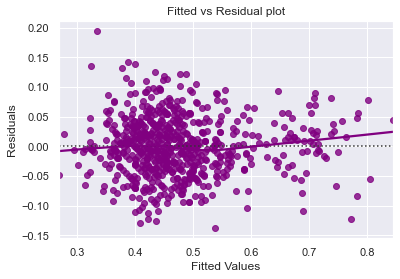

In [47]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### Observations

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

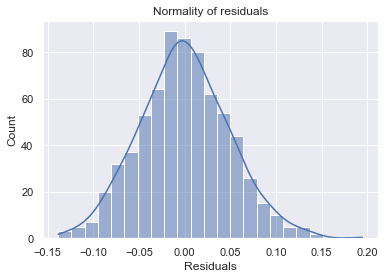

In [48]:
# Complete the code to check for normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

### Observations

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

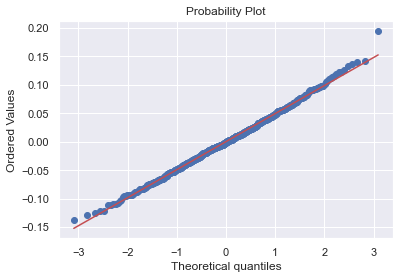

In [49]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)  ## Complete the code check Q-Q plot
plt.show()

### Observations

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.


In [50]:
stats.shapiro(df_pred["Residuals"]) # fill the blank to check p-value

ShapiroResult(statistic=0.9975143074989319, pvalue=0.37990015745162964)

### Observations

- Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test.
- The residuals are normal. 
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [51]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2) ## Complete the code to check homoscedasticity
lzip(name, test)

[('F statistic', 1.1808584229707833), ('p-value', 0.06348616545163326)]

### Observations

- Since p-value > 0.05, the residuals are homoscedastic.
- So, the assumption is satisfied.

## Final Model Summary

In [52]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit() # fill the blank to fit the final model
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 03 Jan 2022   Prob (F-statistic):          3.72e-222
Time:                        14:16:35   Log-Likelihood:                 1116.1
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     688   BIC:                            -2154.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [53]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train) # fill the blank to check the performance on train data
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,MAPE
0,0.049125,0.038719,8.607913


In [54]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test) # fill the blank to check the performance on train data
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,MAPE
0,0.050759,0.040963,9.11115


##  Actionable Insights and Recommendations
### Conclusion 
- Data had no missing value. 
- views_trailer_log is the most significant factor in the data. One unit increase will make a change about 22% in content_view.
- 40% of the events are major sports event. In the major sports event days we are expecting a decrease on content view ~ 6% .
- Eventhough new contents releases mostly on Friday and Wednesday. Saturday and Wednesday are most effective days in terms of content view. 
- ad_impressions was not a good predictor for the data.
- genre had no impact on the data
- Final predictors are visitors, views_trailer_log, major_sports_event_Yes, dayofweek_Monday, dayofweek_Saturday, dayofweek_Sunday, dayofweek_Thursday, dayofweek_Wednesday, season_Spring, season_Summer, season_Winter.     

### Recommendations
- New content should release on Wednesday, Friday and Saturday to maximize the content view. 
- There should be no new content release on the major spors event, because we will miss minimum 6% of the visitors. 
- There should be more content release in the Winter since we have more visitors in that season.
